#  Assignment Week 9 - 10 Term Project Milestone- 4  Digital Currency Cleaning/Formatting  using API connection of the given Data


''' 
 
Name : Karthikeyan Chellamuthu

Date : 05-22-2022

'''

In [1]:
# Importing necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

import os
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Step 1: Reading  data using "requests"/API library's in Python

'''In this week we are trying to analyze if the digital currency is suitable for investment?. In the previous milestones, we have analyzed the csv files having historical trading data for various digital currency and see the price fluctuation is high compared to the trading price of stocks and web data showing metadata about digital currency. We have applied all the required transformations on csv files (data) and web data, and created final datasets with can be used to make a join with other type of datasets. 
As part of this milestone, we are going to analyze API data.  I have created a API in coinmarketcap to get the latest data for the digital currency. The dataset contains so many digital currency. However, we will consider only the digital currency that we have taken into consideration during previous milestones. We can make a request based on number of digitalcurrency or based on name. <br>
https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest '''

In [21]:
# A Json file has been created  to read API key and request for the required data
#  Read data from json file and create headers 
with open("api_key.json") as f:
    json_data = json.load(f)
    f.close()

In [11]:
# Assigning the json_data to headers variable and assign API url to url variable 

headers = json_data
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

In [113]:
# Creating a list of digitalcurrency which we need to request in API to get current data

crypto_currencies = ['ADA','BCH','DOGE','BTC','ETC','ETH','LTC','NEO']

In [38]:
# Requesting Digital currency data from API and Declaring session required to request API data

session = Session()
session.headers.update(headers)

In [94]:
# Take a DOGE sample digital coing  by calling the API request to print/display

parameters['symbol'] = crypto_currencies[2]
print(parameters)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

{'symbol': 'DOGE'}
{'status': {'timestamp': '2022-02-16T01:17:35.018Z', 'error_code': 0, 'error_message': None, 'elapsed': 30, 'credit_count': 1, 'notice': None}, 'data': {'DOGE': {'id': 74, 'name': 'Dogecoin', 'symbol': 'DOGE', 'slug': 'dogecoin', 'num_market_pairs': 446, 'date_added': '2013-12-15T00:00:00.000Z', 'tags': ['mineable', 'pow', 'scrypt', 'medium-of-exchange', 'memes', 'payments', 'binance-smart-chain', 'doggone-doggerel'], 'max_supply': None, 'circulating_supply': 132670764299.89409, 'total_supply': 132670764299.89409, 'is_active': 1, 'platform': None, 'cmc_rank': 11, 'is_fiat': 0, 'self_reported_circulating_supply': None, 'self_reported_market_cap': None, 'last_updated': '2022-02-16T01:16:00.000Z', 'quote': {'USD': {'price': 0.1501636704859218, 'volume_24h': 678306650.7534797, 'volume_change_24h': -13.1853, 'percent_change_1h': -0.72407569, 'percent_change_24h': 3.33607896, 'percent_change_7d': -5.11055103, 'percent_change_30d': -15.14272417, 'percent_change_60d': -10.68

'''The inference is the given data  in nested dictionary format. Hence before reading the data into dataframe, we have to flattened the data so that we can create dataframe for the dataset. Dreating a function called "flatten" to flatten the nested dictionary into linear format'''

In [63]:
# Function to flatten the nested dictionary into linear format

import collections

def flatten(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, collections.MutableMapping):
            items.extend(flatten(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

In [95]:
# Flattening the dataset for Doge digital coin from the above steps

flatten_data = flatten(data)
data_columns = flatten_data.keys()
print("Print the column names:")
print(data_columns)

Print the column names:
dict_keys(['status_timestamp', 'status_error_code', 'status_error_message', 'status_elapsed', 'status_credit_count', 'status_notice', 'data_DOGE_id', 'data_DOGE_name', 'data_DOGE_symbol', 'data_DOGE_slug', 'data_DOGE_num_market_pairs', 'data_DOGE_date_added', 'data_DOGE_tags', 'data_DOGE_max_supply', 'data_DOGE_circulating_supply', 'data_DOGE_total_supply', 'data_DOGE_is_active', 'data_DOGE_platform', 'data_DOGE_cmc_rank', 'data_DOGE_is_fiat', 'data_DOGE_self_reported_circulating_supply', 'data_DOGE_self_reported_market_cap', 'data_DOGE_last_updated', 'data_DOGE_quote_USD_price', 'data_DOGE_quote_USD_volume_24h', 'data_DOGE_quote_USD_volume_change_24h', 'data_DOGE_quote_USD_percent_change_1h', 'data_DOGE_quote_USD_percent_change_24h', 'data_DOGE_quote_USD_percent_change_7d', 'data_DOGE_quote_USD_percent_change_30d', 'data_DOGE_quote_USD_percent_change_60d', 'data_DOGE_quote_USD_percent_change_90d', 'data_DOGE_quote_USD_market_cap', 'data_DOGE_quote_USD_market_ca

In [97]:
# Attribute Formatting and  removing DOGE

column_list = []
for col in data_columns:
    if 'DOGE' in col:
        col = col.replace('DOGE_','')
    column_list.append(col)
print(column_list)

['status_timestamp', 'status_error_code', 'status_error_message', 'status_elapsed', 'status_credit_count', 'status_notice', 'data_id', 'data_name', 'data_symbol', 'data_slug', 'data_num_market_pairs', 'data_date_added', 'data_tags', 'data_max_supply', 'data_circulating_supply', 'data_total_supply', 'data_is_active', 'data_platform', 'data_cmc_rank', 'data_is_fiat', 'data_self_reported_circulating_supply', 'data_self_reported_market_cap', 'data_last_updated', 'data_quote_USD_price', 'data_quote_USD_volume_24h', 'data_quote_USD_volume_change_24h', 'data_quote_USD_percent_change_1h', 'data_quote_USD_percent_change_24h', 'data_quote_USD_percent_change_7d', 'data_quote_USD_percent_change_30d', 'data_quote_USD_percent_change_60d', 'data_quote_USD_percent_change_90d', 'data_quote_USD_market_cap', 'data_quote_USD_market_cap_dominance', 'data_quote_USD_fully_diluted_market_cap', 'data_quote_USD_last_updated']


In [124]:
# Create a for Loop through the list of digital currency  declared in the previous step and get the request from API for each of the currency

df_list = []
for crypto in crypto_currencies:
    
    parameters['symbol'] = crypto
    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        print("\nPrinting the details for the cryptocurrency: {}".format(crypto))
        print(data)
        
        flatten_data = flatten(data)
        print(flatten_data)
        
        df = pd.DataFrame(flatten_data)
        df.columns = column_list
        print('The shape of dataframe: {}'.format(df.shape))
        df_list.append(df)
        
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        
df = pd.concat(df_list, axis=0)  # Adding the dataframe to df_list


Printing the details for the cryptocurrency: ADA
{'status': {'timestamp': '2022-02-16T01:49:28.198Z', 'error_code': 0, 'error_message': None, 'elapsed': 35, 'credit_count': 1, 'notice': None}, 'data': {'ADA': {'id': 2010, 'name': 'Cardano', 'symbol': 'ADA', 'slug': 'cardano', 'num_market_pairs': 364, 'date_added': '2017-10-01T00:00:00.000Z', 'tags': ['mineable', 'dpos', 'pos', 'platform', 'research', 'smart-contracts', 'staking', 'binance-smart-chain', 'cardano-ecosystem', 'cardano'], 'max_supply': 45000000000, 'circulating_supply': 33613420243.99, 'total_supply': 34105094650.087, 'is_active': 1, 'platform': None, 'cmc_rank': 7, 'is_fiat': 0, 'self_reported_circulating_supply': None, 'self_reported_market_cap': None, 'last_updated': '2022-02-16T01:48:00.000Z', 'quote': {'USD': {'price': 1.0990844571343013, 'volume_24h': 1308453639.4361248, 'volume_change_24h': 9.3532, 'percent_change_1h': -0.52848559, 'percent_change_24h': 2.34419718, 'percent_change_7d': -6.82780106, 'percent_change_


Printing the details for the cryptocurrency: ETC
{'status': {'timestamp': '2022-02-16T01:49:28.847Z', 'error_code': 0, 'error_message': None, 'elapsed': 32, 'credit_count': 1, 'notice': None}, 'data': {'ETC': {'id': 1321, 'name': 'Ethereum Classic', 'symbol': 'ETC', 'slug': 'ethereum-classic', 'num_market_pairs': 286, 'date_added': '2016-07-24T00:00:00.000Z', 'tags': ['mineable', 'pow', 'ethash', 'platform', 'smart-contracts', 'binance-smart-chain', 'dcg-portfolio'], 'max_supply': 210700000, 'circulating_supply': 132996149.32173578, 'total_supply': 210700000, 'is_active': 1, 'platform': None, 'cmc_rank': 37, 'is_fiat': 0, 'self_reported_circulating_supply': None, 'self_reported_market_cap': None, 'last_updated': '2022-02-16T01:48:00.000Z', 'quote': {'USD': {'price': 32.829660868750615, 'volume_24h': 525840993.66742784, 'volume_change_24h': -6.1383, 'percent_change_1h': -1.20876973, 'percent_change_24h': 1.98689495, 'percent_change_7d': 1.69659537, 'percent_change_30d': 2.82919274, 'pe

In [123]:
# Display some sample records from the dataframe 

df.head()

,status_timestamp,status_error_code,status_error_message,status_elapsed,status_credit_count,status_notice,data_id,data_name,data_symbol,data_slug,...,data_quote_USD_percent_change_1h,data_quote_USD_percent_change_24h,data_quote_USD_percent_change_7d,data_quote_USD_percent_change_30d,data_quote_USD_percent_change_60d,data_quote_USD_percent_change_90d,data_quote_USD_market_cap,data_quote_USD_market_cap_dominance,data_quote_USD_fully_diluted_market_cap,data_quote_USD_last_updated
0,2022-02-16T01:48:16.954Z,0,None,27,1,None,2010,Cardano,ADA,cardano,...,-0.534111,2.406927,-6.842254,-21.009296,-9.364493,-41.998925,3.694384e+10,1.8588,4.945861e+10,2022-02-16T01:47:00.000Z
1,2022-02-16T01:48:16.954Z,0,None,27,1,None,2010,Cardano,ADA,cardano,...,-0.534111,2.406927,-6.842254,-21.009296,-9.364493,-41.998925,3.694384e+10,1.8588,4.945861e+10,2022-02-16T01:47:00.000Z
2,2022-02-16T01:48:16.954Z,0,None,27,1,None,2010,Cardano,ADA,cardano,...,-0.534111,2.406927,-6.842254,-21.009296,-9.364493,-41.998925,3.694384e+10,1.8588,4.945861e+10,2022-02-16T01:47:00.000Z
3,2022-02-16T01:48:16.954Z,0,None,27,1,None,2010,Cardano,ADA,cardano,...,-0.534111,2.406927,-6.842254,-21.009296,-9.364493,-41.998925,3.694384e+10,1.8588,4.945861e+10,2022-02-16T01:47:00.000Z
4,2022-02-16T01:48:16.954Z,0,None,27,1,None,2010,Cardano,ADA,cardano,...,-0.534111,2.406927,-6.842254,-21.009296,-9.364493,-41.998925,3.694384e+10,1.8588,4.945861e+10,2022-02-16T01:47:00.000Z


In [125]:
# Calculate the number of rows and columns in the Final dataframe 

print("Total number of rows and columns present in the  final dataframe: {}".format(df.shape))

Total number of rows and columns present in the dataframe: (102, 36)


In [130]:
# Display the attributes names present in the dataframe df

df.columns

Index(['status_timestamp', 'status_error_code', 'status_error_message',
       'status_elapsed', 'status_credit_count', 'status_notice', 'data_id',
       'data_name', 'data_symbol', 'data_slug', 'data_num_market_pairs',
       'data_date_added', 'data_tags', 'data_max_supply',
       'data_circulating_supply', 'data_total_supply', 'data_is_active',
       'data_platform', 'data_cmc_rank', 'data_is_fiat',
       'data_self_reported_circulating_supply',
       'data_self_reported_market_cap', 'data_last_updated',
       'data_quote_USD_price', 'data_quote_USD_volume_24h',
       'data_quote_USD_volume_change_24h', 'data_quote_USD_percent_change_1h',
       'data_quote_USD_percent_change_24h', 'data_quote_USD_percent_change_7d',
       'data_quote_USD_percent_change_30d',
       'data_quote_USD_percent_change_60d',
       'data_quote_USD_percent_change_90d', 'data_quote_USD_market_cap',
       'data_quote_USD_market_cap_dominance',
       'data_quote_USD_fully_diluted_market_cap',
      

Tether (USDT) cryptocurrency has additional 4 columns as mentioned below compared to other cryptocurrencies taken into consideration. So, we have to format the dataset so that we can merge USDT with the dataframe created above <br>

data_platform_id <br>
data_platform_name <br>
data_platform_symbol <br>
data_platform_slug <br>
data_platform_token_address

In [156]:
# Step2: Adding additional dataset and formatting columns

# USDT has more number of columns compared to other digital currency and  Reading the data for USDT

parameters['symbol'] = 'USDT'
print(parameters)

try:
    response = session.get(url, params=parameters)
    usdt_data = json.loads(response.text)
    print(usdt_data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

flatten_usdt_data = flatten(usdt_data)
usdt_data_columns = flatten_usdt_data.keys()
print("Print the column names for USDT dataset: ")
print(usdt_data_columns)

usdt_column_list = []
for col in usdt_data_columns:
    if 'USDT' in col:
        col = col.replace('USDT_','')
    usdt_column_list.append(col)
print(usdt_column_list)

usdt_df = pd.DataFrame(flatten_usdt_data)
usdt_df.columns = usdt_column_list

{'symbol': 'USDT'}
{'status': {'timestamp': '2022-02-16T03:55:30.342Z', 'error_code': 0, 'error_message': None, 'elapsed': 36, 'credit_count': 1, 'notice': None}, 'data': {'USDT': {'id': 825, 'name': 'Tether', 'symbol': 'USDT', 'slug': 'tether', 'num_market_pairs': 27987, 'date_added': '2015-02-25T00:00:00.000Z', 'tags': ['payments', 'stablecoin', 'asset-backed-stablecoin', 'binance-smart-chain', 'avalanche-ecosystem', 'solana-ecosystem', 'moonriver-ecosystem', 'injective-ecosystem'], 'max_supply': None, 'circulating_supply': 78641051388.78949, 'total_supply': 81064697052.54242, 'platform': {'id': 1027, 'name': 'Ethereum', 'symbol': 'ETH', 'slug': 'ethereum', 'token_address': '0xdac17f958d2ee523a2206206994597c13d831ec7'}, 'is_active': 1, 'cmc_rank': 3, 'is_fiat': 0, 'self_reported_circulating_supply': None, 'self_reported_market_cap': None, 'last_updated': '2022-02-16T03:54:00.000Z', 'quote': {'USD': {'price': 1.000576060314811, 'volume_24h': 51821747736.79891, 'volume_change_24h': 2.6

In [157]:
# UDST dataframe has been created

usdt_df.head()

,status_timestamp,status_error_code,status_error_message,status_elapsed,status_credit_count,status_notice,data_id,data_name,data_symbol,data_slug,...,data_quote_USD_percent_change_1h,data_quote_USD_percent_change_24h,data_quote_USD_percent_change_7d,data_quote_USD_percent_change_30d,data_quote_USD_percent_change_60d,data_quote_USD_percent_change_90d,data_quote_USD_market_cap,data_quote_USD_market_cap_dominance,data_quote_USD_fully_diluted_market_cap,data_quote_USD_last_updated
0,2022-02-16T03:55:30.342Z,0,None,36,1,None,825,Tether,USDT,tether,...,-0.001065,0.006489,-0.013887,0.030253,0.016919,0.009691,7.868635e+10,3.9588,8.111140e+10,2022-02-16T03:54:00.000Z
1,2022-02-16T03:55:30.342Z,0,None,36,1,None,825,Tether,USDT,tether,...,-0.001065,0.006489,-0.013887,0.030253,0.016919,0.009691,7.868635e+10,3.9588,8.111140e+10,2022-02-16T03:54:00.000Z
2,2022-02-16T03:55:30.342Z,0,None,36,1,None,825,Tether,USDT,tether,...,-0.001065,0.006489,-0.013887,0.030253,0.016919,0.009691,7.868635e+10,3.9588,8.111140e+10,2022-02-16T03:54:00.000Z
3,2022-02-16T03:55:30.342Z,0,None,36,1,None,825,Tether,USDT,tether,...,-0.001065,0.006489,-0.013887,0.030253,0.016919,0.009691,7.868635e+10,3.9588,8.111140e+10,2022-02-16T03:54:00.000Z
4,2022-02-16T03:55:30.342Z,0,None,36,1,None,825,Tether,USDT,tether,...,-0.001065,0.006489,-0.013887,0.030253,0.016919,0.009691,7.868635e+10,3.9588,8.111140e+10,2022-02-16T03:54:00.000Z


In [158]:
# Display the sample values and shape

print("The shape of the usdt dataframe: {}".format(usdt_df.shape))

The shape of the usdt dataframe: (8, 40)


In [159]:
# Finding additional attributes  present in UDST dataset

usdt_extra_col = [col for col in usdt_column_list if col not in column_list]
usdt_extra_col.remove('data_platform_name')
print(usdt_extra_col)

['data_platform_id', 'data_platform_symbol', 'data_platform_slug', 'data_platform_token_address']


In [160]:
# Drop extra columns in the dataframe

usdt_df = usdt_df.drop(columns= usdt_extra_col)

In [162]:
# Print or display the sample values of usdt

usdt_df.head()

,status_timestamp,status_error_code,status_error_message,status_elapsed,status_credit_count,status_notice,data_id,data_name,data_symbol,data_slug,...,data_quote_USD_percent_change_1h,data_quote_USD_percent_change_24h,data_quote_USD_percent_change_7d,data_quote_USD_percent_change_30d,data_quote_USD_percent_change_60d,data_quote_USD_percent_change_90d,data_quote_USD_market_cap,data_quote_USD_market_cap_dominance,data_quote_USD_fully_diluted_market_cap,data_quote_USD_last_updated
0,2022-02-16T03:55:30.342Z,0,None,36,1,None,825,Tether,USDT,tether,...,-0.001065,0.006489,-0.013887,0.030253,0.016919,0.009691,7.868635e+10,3.9588,8.111140e+10,2022-02-16T03:54:00.000Z
1,2022-02-16T03:55:30.342Z,0,None,36,1,None,825,Tether,USDT,tether,...,-0.001065,0.006489,-0.013887,0.030253,0.016919,0.009691,7.868635e+10,3.9588,8.111140e+10,2022-02-16T03:54:00.000Z
2,2022-02-16T03:55:30.342Z,0,None,36,1,None,825,Tether,USDT,tether,...,-0.001065,0.006489,-0.013887,0.030253,0.016919,0.009691,7.868635e+10,3.9588,8.111140e+10,2022-02-16T03:54:00.000Z
3,2022-02-16T03:55:30.342Z,0,None,36,1,None,825,Tether,USDT,tether,...,-0.001065,0.006489,-0.013887,0.030253,0.016919,0.009691,7.868635e+10,3.9588,8.111140e+10,2022-02-16T03:54:00.000Z
4,2022-02-16T03:55:30.342Z,0,None,36,1,None,825,Tether,USDT,tether,...,-0.001065,0.006489,-0.013887,0.030253,0.016919,0.009691,7.868635e+10,3.9588,8.111140e+10,2022-02-16T03:54:00.000Z


In [163]:
# Combining the usdt dataset with original dataframe and One of the column name is named as data_platform_name which has to be replaced with data_platform in sync with original df

usdt_df.rename(columns={'data_platform_name': 'data_platform'}, inplace=True)

In [166]:
#Display the count of rows and columns present in usdt dataframe

print("The number of rows and columns present in the usdt dataframe: {}".format(usdt_df.shape))

The number of rows and columns present in the usdt dataframe: (8, 36)


In [168]:
# Combining the usdt dataset with original dataframe

crypto_raw_df = pd.concat([df, usdt_df], axis=0)

In [169]:
# Display  the shape of final dataframe

print("The number of rows and columns present in the final dataframe: {}".format(crypto_raw_df.shape))

The number of rows and columns present in the final dataframe: (110, 36)


From the above result, we could see the total number of records in the final dataframe is 110 (102+8) which is correct as expected. The dataframe contains the data for below cryptocurrencies. <br>
'ADA','BCH','DOGE','BTC','ETC','ETH','LTC','NEO' and 'USDT

In [170]:
# Step 3: Handling null /missing values from the dataset

# Calculating number of null rows present in the dataset across all columns

print("Number of Null rows in the dataset: {}".format(crypto_raw_df.isnull().sum()))

Number of Null rows in the dataset: status_timestamp                             0
status_error_code                            0
status_error_message                       110
status_elapsed                               0
status_credit_count                          0
status_notice                              110
data_id                                      0
data_name                                    0
data_symbol                                  0
data_slug                                    0
data_num_market_pairs                        0
data_date_added                              0
data_tags                                    0
data_max_supply                             46
data_circulating_supply                      0
data_total_supply                            0
data_is_active                               0
data_platform                              102
data_cmc_rank                                0
data_is_fiat                                 0
data_self_reported_circu

From the above result, we could see below columns or fields doesn't make any value to the dataset. Among these values, couple of fields are having null values for all the records. So, we can remove these columns from the dataframe <br>

status_error_code <br>
status_error_message <br>
status_elapsed <br>
status_credit_count <br>
status_notice <br>

In [172]:
# Cleanse the unwanted columns from the dataframe

unwanted_cols = ['status_error_code','status_error_message','status_elapsed','status_credit_count','status_notice']
digital_df = crypto_raw_df.drop(columns= unwanted_cols)

In [173]:
# Display the dataset after removing null and unwated columns 

digital_df.head()

,status_timestamp,data_id,data_name,data_symbol,data_slug,data_num_market_pairs,data_date_added,data_tags,data_max_supply,data_circulating_supply,...,data_quote_USD_percent_change_1h,data_quote_USD_percent_change_24h,data_quote_USD_percent_change_7d,data_quote_USD_percent_change_30d,data_quote_USD_percent_change_60d,data_quote_USD_percent_change_90d,data_quote_USD_market_cap,data_quote_USD_market_cap_dominance,data_quote_USD_fully_diluted_market_cap,data_quote_USD_last_updated
0,2022-02-16T01:49:28.198Z,2010,Cardano,ADA,cardano,364,2017-10-01T00:00:00.000Z,mineable,45000000000,3.361342e+10,...,-0.528486,2.344197,-6.827801,-21.009013,-9.376118,-41.953785,3.694399e+10,1.8588,4.945880e+10,2022-02-16T01:48:00.000Z
1,2022-02-16T01:49:28.198Z,2010,Cardano,ADA,cardano,364,2017-10-01T00:00:00.000Z,dpos,45000000000,3.361342e+10,...,-0.528486,2.344197,-6.827801,-21.009013,-9.376118,-41.953785,3.694399e+10,1.8588,4.945880e+10,2022-02-16T01:48:00.000Z
2,2022-02-16T01:49:28.198Z,2010,Cardano,ADA,cardano,364,2017-10-01T00:00:00.000Z,pos,45000000000,3.361342e+10,...,-0.528486,2.344197,-6.827801,-21.009013,-9.376118,-41.953785,3.694399e+10,1.8588,4.945880e+10,2022-02-16T01:48:00.000Z
3,2022-02-16T01:49:28.198Z,2010,Cardano,ADA,cardano,364,2017-10-01T00:00:00.000Z,platform,45000000000,3.361342e+10,...,-0.528486,2.344197,-6.827801,-21.009013,-9.376118,-41.953785,3.694399e+10,1.8588,4.945880e+10,2022-02-16T01:48:00.000Z
4,2022-02-16T01:49:28.198Z,2010,Cardano,ADA,cardano,364,2017-10-01T00:00:00.000Z,research,45000000000,3.361342e+10,...,-0.528486,2.344197,-6.827801,-21.009013,-9.376118,-41.953785,3.694399e+10,1.8588,4.945880e+10,2022-02-16T01:48:00.000Z


In [175]:
# Calculate the total number of rows and columns from the latest dataset

print("Total number of rows and columns present in the dataset: {}".format(digital_df.shape))

Total number of rows and columns present in the dataset: (110, 31)


In [176]:
# Step 4: Handling  null rows from the dataset
 
# Calculating number of null rows present in the dataset

print("Number of Null rows in the dataset: {}".format(digital_df.data_symbol.isnull().sum()))

Number of Null rows in the dataset: 0


We have considered "data_symbol" field to check for null values. This is a mandatory field which should have values populated. On checking, we could see there is no null row present in the dataset. 

In [177]:
# Step 5: Replace Headers with more meaningful names

# Printing the column names present in the dataframe

digital_df.columns

Index(['status_timestamp', 'data_id', 'data_name', 'data_symbol', 'data_slug',
       'data_num_market_pairs', 'data_date_added', 'data_tags',
       'data_max_supply', 'data_circulating_supply', 'data_total_supply',
       'data_is_active', 'data_platform', 'data_cmc_rank', 'data_is_fiat',
       'data_self_reported_circulating_supply',
       'data_self_reported_market_cap', 'data_last_updated',
       'data_quote_USD_price', 'data_quote_USD_volume_24h',
       'data_quote_USD_volume_change_24h', 'data_quote_USD_percent_change_1h',
       'data_quote_USD_percent_change_24h', 'data_quote_USD_percent_change_7d',
       'data_quote_USD_percent_change_30d',
       'data_quote_USD_percent_change_60d',
       'data_quote_USD_percent_change_90d', 'data_quote_USD_market_cap',
       'data_quote_USD_market_cap_dominance',
       'data_quote_USD_fully_diluted_market_cap',
       'data_quote_USD_last_updated'],
      dtype='object')

In [180]:
# Display few records using head command

digital_df.head()

,status_timestamp,data_id,data_name,data_symbol,data_slug,data_num_market_pairs,data_date_added,data_tags,data_max_supply,data_circulating_supply,...,data_quote_USD_percent_change_1h,data_quote_USD_percent_change_24h,data_quote_USD_percent_change_7d,data_quote_USD_percent_change_30d,data_quote_USD_percent_change_60d,data_quote_USD_percent_change_90d,data_quote_USD_market_cap,data_quote_USD_market_cap_dominance,data_quote_USD_fully_diluted_market_cap,data_quote_USD_last_updated
0,2022-02-16T01:49:28.198Z,2010,Cardano,ADA,cardano,364,2017-10-01T00:00:00.000Z,mineable,45000000000,3.361342e+10,...,-0.528486,2.344197,-6.827801,-21.009013,-9.376118,-41.953785,3.694399e+10,1.8588,4.945880e+10,2022-02-16T01:48:00.000Z
1,2022-02-16T01:49:28.198Z,2010,Cardano,ADA,cardano,364,2017-10-01T00:00:00.000Z,dpos,45000000000,3.361342e+10,...,-0.528486,2.344197,-6.827801,-21.009013,-9.376118,-41.953785,3.694399e+10,1.8588,4.945880e+10,2022-02-16T01:48:00.000Z
2,2022-02-16T01:49:28.198Z,2010,Cardano,ADA,cardano,364,2017-10-01T00:00:00.000Z,pos,45000000000,3.361342e+10,...,-0.528486,2.344197,-6.827801,-21.009013,-9.376118,-41.953785,3.694399e+10,1.8588,4.945880e+10,2022-02-16T01:48:00.000Z
3,2022-02-16T01:49:28.198Z,2010,Cardano,ADA,cardano,364,2017-10-01T00:00:00.000Z,platform,45000000000,3.361342e+10,...,-0.528486,2.344197,-6.827801,-21.009013,-9.376118,-41.953785,3.694399e+10,1.8588,4.945880e+10,2022-02-16T01:48:00.000Z
4,2022-02-16T01:49:28.198Z,2010,Cardano,ADA,cardano,364,2017-10-01T00:00:00.000Z,research,45000000000,3.361342e+10,...,-0.528486,2.344197,-6.827801,-21.009013,-9.376118,-41.953785,3.694399e+10,1.8588,4.945880e+10,2022-02-16T01:48:00.000Z


In [181]:
#Change or rename the attributs 

digital_df.rename(columns={'data_id': 'crypto_id', 'data_name': 'crypto_name', 'data_symbol': 'symbol','data_slug': 'crypto_slug','data_num_market_pairs': 'num_market_pairs','data_date_added':'found_date','data_tags':'tags','data_max_supply':'maximum_num_supply','data_circulating_supply':'circulating_supply','data_total_supply':'total_num_supply','data_is_active':'active_flag','data_platform':'platform','data_cmc_rank':'crypto_cmc_rank','data_is_fiat':'is_fiat','data_self_reported_circulating_supply':'circulating_supply','data_self_reported_market_cap':'market_cap','data_last_updated':'last_update_dt','data_quote_USD_price':'usd_price','data_quote_USD_volume_24h':'usd_volume_24h','data_quote_USD_volume_change_24h':'usd_volume_change_24h','data_quote_USD_percent_change_1h':'usd_percent_change_1h','data_quote_USD_percent_change_24h':'usd_percent_change_24h','data_quote_USD_percent_change_7d':'usd_percent_change_7d','data_quote_USD_percent_change_30d':'usd_percent_change_30d','data_quote_USD_percent_change_60d':'usd_percent_change_60d','data_quote_USD_percent_change_90d':'usd_percent_change_90d','data_quote_USD_market_cap':'usd_market_cap','data_quote_USD_market_cap_dominance':'usd_market_cap_dominance','data_quote_USD_fully_diluted_market_cap':'usd_fully_diluted_market_cap','data_quote_USD_last_updated':'usd_last_updated_tm'}, inplace=True)

In [182]:
# Display the columns name after converting the column names

digital_df.head()

,status_timestamp,crypto_id,crypto_name,symbol,crypto_slug,num_market_pairs,found_date,tags,maximum_num_supply,circulating_supply,...,usd_percent_change_1h,usd_percent_change_24h,usd_percent_change_7d,usd_percent_change_30d,usd_percent_change_60d,usd_percent_change_90d,usd_market_cap,usd_market_cap_dominance,usd_fully_diluted_market_cap,usd_last_updated_tm
0,2022-02-16T01:49:28.198Z,2010,Cardano,ADA,cardano,364,2017-10-01T00:00:00.000Z,mineable,45000000000,3.361342e+10,...,-0.528486,2.344197,-6.827801,-21.009013,-9.376118,-41.953785,3.694399e+10,1.8588,4.945880e+10,2022-02-16T01:48:00.000Z
1,2022-02-16T01:49:28.198Z,2010,Cardano,ADA,cardano,364,2017-10-01T00:00:00.000Z,dpos,45000000000,3.361342e+10,...,-0.528486,2.344197,-6.827801,-21.009013,-9.376118,-41.953785,3.694399e+10,1.8588,4.945880e+10,2022-02-16T01:48:00.000Z
2,2022-02-16T01:49:28.198Z,2010,Cardano,ADA,cardano,364,2017-10-01T00:00:00.000Z,pos,45000000000,3.361342e+10,...,-0.528486,2.344197,-6.827801,-21.009013,-9.376118,-41.953785,3.694399e+10,1.8588,4.945880e+10,2022-02-16T01:48:00.000Z
3,2022-02-16T01:49:28.198Z,2010,Cardano,ADA,cardano,364,2017-10-01T00:00:00.000Z,platform,45000000000,3.361342e+10,...,-0.528486,2.344197,-6.827801,-21.009013,-9.376118,-41.953785,3.694399e+10,1.8588,4.945880e+10,2022-02-16T01:48:00.000Z
4,2022-02-16T01:49:28.198Z,2010,Cardano,ADA,cardano,364,2017-10-01T00:00:00.000Z,research,45000000000,3.361342e+10,...,-0.528486,2.344197,-6.827801,-21.009013,-9.376118,-41.953785,3.694399e+10,1.8588,4.945880e+10,2022-02-16T01:48:00.000Z


In [183]:
# Displaying the column names after renaming

digital_df.columns

Index(['status_timestamp', 'crypto_id', 'crypto_name', 'symbol', 'crypto_slug',
       'num_market_pairs', 'found_date', 'tags', 'maximum_num_supply',
       'circulating_supply', 'total_num_supply', 'active_flag', 'platform',
       'crypto_cmc_rank', 'is_fiat', 'circulating_supply', 'market_cap',
       'last_update_dt', 'usd_price', 'usd_volume_24h',
       'usd_volume_change_24h', 'usd_percent_change_1h',
       'usd_percent_change_24h', 'usd_percent_change_7d',
       'usd_percent_change_30d', 'usd_percent_change_60d',
       'usd_percent_change_90d', 'usd_market_cap', 'usd_market_cap_dominance',
       'usd_fully_diluted_market_cap', 'usd_last_updated_tm'],
      dtype='object')

In [185]:
# Step 6: Replace datatypes based on column values

# Display the datatypes of all the columns present in the dataframe

digital_df.dtypes

status_timestamp                 object
crypto_id                         int64
crypto_name                      object
symbol                           object
crypto_slug                      object
num_market_pairs                  int64
found_date                       object
tags                             object
maximum_num_supply               object
circulating_supply              float64
total_num_supply                float64
active_flag                       int64
platform                         object
crypto_cmc_rank                   int64
is_fiat                           int64
circulating_supply               object
market_cap                       object
last_update_dt                   object
usd_price                       float64
usd_volume_24h                  float64
usd_volume_change_24h           float64
usd_percent_change_1h           float64
usd_percent_change_24h          float64
usd_percent_change_7d           float64
usd_percent_change_30d          float64


From the above result, we could see float and int columns are populated with correct datatypes before. Now, we would want to change the date and timestamp columns 

In [192]:
# Change the attributes date and time values to datetime datatype.

digital_df['usd_last_updated_tm'] =  pd.to_datetime(digital_df['usd_last_updated_tm'])
digital_df['status_timestamp'] =  pd.to_datetime(digital_df['status_timestamp'])
digital_df['last_update_dt'] =  pd.to_datetime(digital_df['last_update_dt'])
digital_df['found_date'] =  pd.to_datetime(digital_df['found_date'])          

In [193]:
# Display the datatypes after the conversion

digital_df.dtypes

status_timestamp                datetime64[ns, UTC]
crypto_id                                     int64
crypto_name                                  object
symbol                                       object
crypto_slug                                  object
num_market_pairs                              int64
found_date                      datetime64[ns, UTC]
tags                                         object
maximum_num_supply                           object
circulating_supply                          float64
total_num_supply                            float64
active_flag                                   int64
platform                                     object
crypto_cmc_rank                               int64
is_fiat                                       int64
circulating_supply                           object
market_cap                                   object
last_update_dt                  datetime64[ns, UTC]
usd_price                                   float64
usd_volume_2

In [194]:
# Step 7: Find and remove duplicates from the dataset

#  Checking if there are any duplicate values within the dataframe, at a row level

duplicate_df = digital_df[digital_df.duplicated()]

In [195]:
# Display the redundents to check if there is any duplicates present in the dataframe

duplicate_df

,status_timestamp,crypto_id,crypto_name,symbol,crypto_slug,num_market_pairs,found_date,tags,maximum_num_supply,circulating_supply,...,usd_percent_change_1h,usd_percent_change_24h,usd_percent_change_7d,usd_percent_change_30d,usd_percent_change_60d,usd_percent_change_90d,usd_market_cap,usd_market_cap_dominance,usd_fully_diluted_market_cap,usd_last_updated_tm


In [196]:
#  Calculate the size of dataframe after removing the duplicates

digital_df.shape

(110, 31)

# We can conclued or could  see that there is no duplicates present in the dataframe. The size remains same as before

In [200]:
# Index resetting values of the dataframe

digital_df = digital_df.reset_index()
del digital_df['index']

In [202]:
# Display  the records present in the dataframe

del digital_df['level_0']
digital_df

,status_timestamp,crypto_id,crypto_name,symbol,crypto_slug,num_market_pairs,found_date,tags,maximum_num_supply,circulating_supply,...,usd_percent_change_1h,usd_percent_change_24h,usd_percent_change_7d,usd_percent_change_30d,usd_percent_change_60d,usd_percent_change_90d,usd_market_cap,usd_market_cap_dominance,usd_fully_diluted_market_cap,usd_last_updated_tm
0,2022-02-16 01:49:28.198000+00:00,2010,Cardano,ADA,cardano,364,2017-10-01 00:00:00+00:00,mineable,45000000000,3.361342e+10,...,-0.528486,2.344197,-6.827801,-21.009013,-9.376118,-41.953785,3.694399e+10,1.8588,4.945880e+10,2022-02-16 01:48:00+00:00
1,2022-02-16 01:49:28.198000+00:00,2010,Cardano,ADA,cardano,364,2017-10-01 00:00:00+00:00,dpos,45000000000,3.361342e+10,...,-0.528486,2.344197,-6.827801,-21.009013,-9.376118,-41.953785,3.694399e+10,1.8588,4.945880e+10,2022-02-16 01:48:00+00:00
2,2022-02-16 01:49:28.198000+00:00,2010,Cardano,ADA,cardano,364,2017-10-01 00:00:00+00:00,pos,45000000000,3.361342e+10,...,-0.528486,2.344197,-6.827801,-21.009013,-9.376118,-41.953785,3.694399e+10,1.8588,4.945880e+10,2022-02-16 01:48:00+00:00
3,2022-02-16 01:49:28.198000+00:00,2010,Cardano,ADA,cardano,364,2017-10-01 00:00:00+00:00,platform,45000000000,3.361342e+10,...,-0.528486,2.344197,-6.827801,-21.009013,-9.376118,-41.953785,3.694399e+10,1.8588,4.945880e+10,2022-02-16 01:48:00+00:00
4,2022-02-16 01:49:28.198000+00:00,2010,Cardano,ADA,cardano,364,2017-10-01 00:00:00+00:00,research,45000000000,3.361342e+10,...,-0.528486,2.344197,-6.827801,-21.009013,-9.376118,-41.953785,3.694399e+10,1.8588,4.945880e+10,2022-02-16 01:48:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2022-02-16 03:55:30.342000+00:00,825,Tether,USDT,tether,27987,2015-02-25 00:00:00+00:00,binance-smart-chain,None,7.864105e+10,...,-0.001065,0.006489,-0.013887,0.030253,0.016919,0.009691,7.868635e+10,3.9588,8.111140e+10,2022-02-16 03:54:00+00:00
106,2022-02-16 03:55:30.342000+00:00,825,Tether,USDT,tether,27987,2015-02-25 00:00:00+00:00,avalanche-ecosystem,None,7.864105e+10,...,-0.001065,0.006489,-0.013887,0.030253,0.016919,0.009691,7.868635e+10,3.9588,8.111140e+10,2022-02-16 03:54:00+00:00
107,2022-02-16 03:55:30.342000+00:00,825,Tether,USDT,tether,27987,2015-02-25 00:00:00+00:00,solana-ecosystem,None,7.864105e+10,...,-0.001065,0.006489,-0.013887,0.030253,0.016919,0.009691,7.868635e+10,3.9588,8.111140e+10,2022-02-16 03:54:00+00:00
108,2022-02-16 03:55:30.342000+00:00,825,Tether,USDT,tether,27987,2015-02-25 00:00:00+00:00,moonriver-ecosystem,None,7.864105e+10,...,-0.001065,0.006489,-0.013887,0.030253,0.016919,0.009691,7.868635e+10,3.9588,8.111140e+10,2022-02-16 03:54:00+00:00


From the data, we will create another dataframe with precentage fields

In [204]:
# Step 8: Fuzzy matching and  Pictorial representation of percentage change


# Adding a subset of dataframe with usd percent change

digital_df_pic = digital_df.loc[:, ['symbol','usd_percent_change_1h', 'usd_percent_change_24h', 'usd_percent_change_7d', 'usd_percent_change_30d', 'usd_percent_change_60d','usd_percent_change_90d']]

In [205]:
# Cleance duplicates from the dataframe

digital_df_pic.drop_duplicates(inplace = True)

In [207]:
#Print the total record count and sample records from the dataframe

print("Total number of rows and columns present in the dataframe: {}".format(digital_df_pic.shape))

Total number of rows and columns present in the dataframe: (9, 7)


In [208]:
digital_df_pic.head()

,symbol,usd_percent_change_1h,usd_percent_change_24h,usd_percent_change_7d,usd_percent_change_30d,usd_percent_change_60d,usd_percent_change_90d
0,ADA,-0.528486,2.344197,-6.827801,-21.009013,-9.376118,-41.953785
10,BCH,-1.101120,0.135205,0.920784,-12.370709,-20.152384,-43.683092
20,DOGE,-0.312957,1.055212,-4.818581,-14.673491,-10.491055,-37.418471
28,BTC,-0.447949,1.357519,-0.057946,2.647481,-4.067191,-27.367810
56,ETC,-1.208770,1.986895,1.696595,2.829193,-3.945873,-36.294069


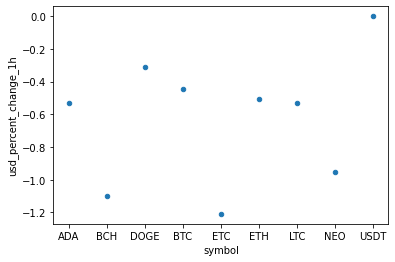

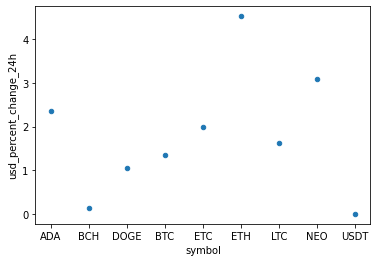

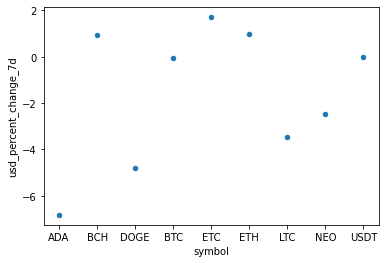

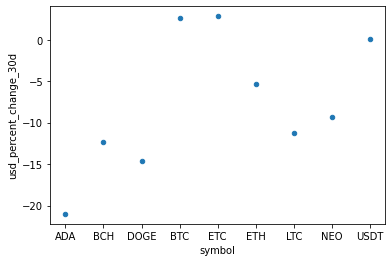

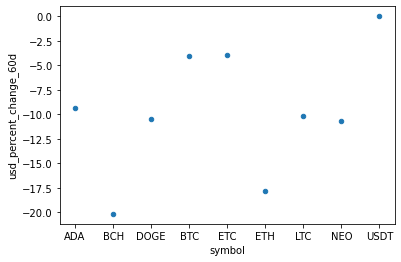

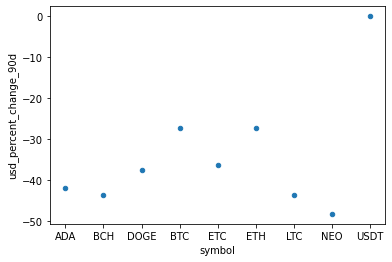

In [213]:
## Plotting scatter plot for all the above columns taken into consideration

for col in list(digital_df_pic.columns):
    if col != 'symbol':
        digital_df_pic.plot.scatter(x = 'symbol', y = col)

# Final finding from the graph shows that we can see the percentage change value across the days is very high compared to stocks and other investment.

In [214]:
# Step 9: Saving the final output to CSV file

# Store the final dataframe to csv file which can be used to make join with other dataframes

digital_df.to_csv("Crypto_Currencies_api_dataset.csv", index=False)